In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Prayagraj_Traffic_Data_Cleaned.csv')
df.sample(5)

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,is_weekend,hour_of_day
3163,9919.0,2023-01-07 21:10:00,9.0,MNNIT Gate,25.4920,81.8639,56.0,33.02,120.0,58.0,4.0,58.0,Fog,Saturday,0.0,0,1.13,35.0,8.0,2.0,11.0,1,21
8704,4214.0,2023-01-03 22:10:00,4.0,Tagore Town,25.4675,81.8867,77.0,34.70,120.0,68.0,3.0,49.0,Clear,Tuesday,0.0,0,1.85,41.0,11.0,10.0,15.0,0,22
5434,4240.0,2023-01-03 22:30:00,10.0,Minto Park,25.4352,81.8820,46.0,41.82,120.0,61.0,3.0,56.0,Clear,Tuesday,0.0,0,0.97,29.0,5.0,5.0,7.0,0,22
6623,7473.0,2023-01-06 04:30:00,3.0,Chowk,25.4314,81.8437,172.0,13.44,120.0,73.0,4.0,43.0,Clear,Friday,0.0,2,3.32,93.0,16.0,17.0,46.0,0,4
7320,507.0,2023-01-01 08:20:00,7.0,Phaphamau,25.4945,81.8686,74.0,39.87,120.0,58.0,6.0,56.0,Clear,Sunday,1.0,0,1.44,44.0,4.0,12.0,14.0,1,8


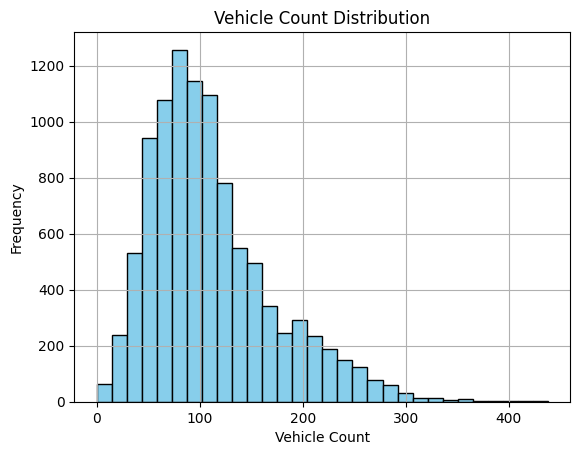

In [3]:
# Plot histogram for a specific column (e.g., 'vehicle_count')
df['vehicle_count'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicle Count')
plt.ylabel('Frequency')
plt.show()



C:\Users\mahes\AppData\Local\Temp\ipykernel_22792\650876654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='viridis')


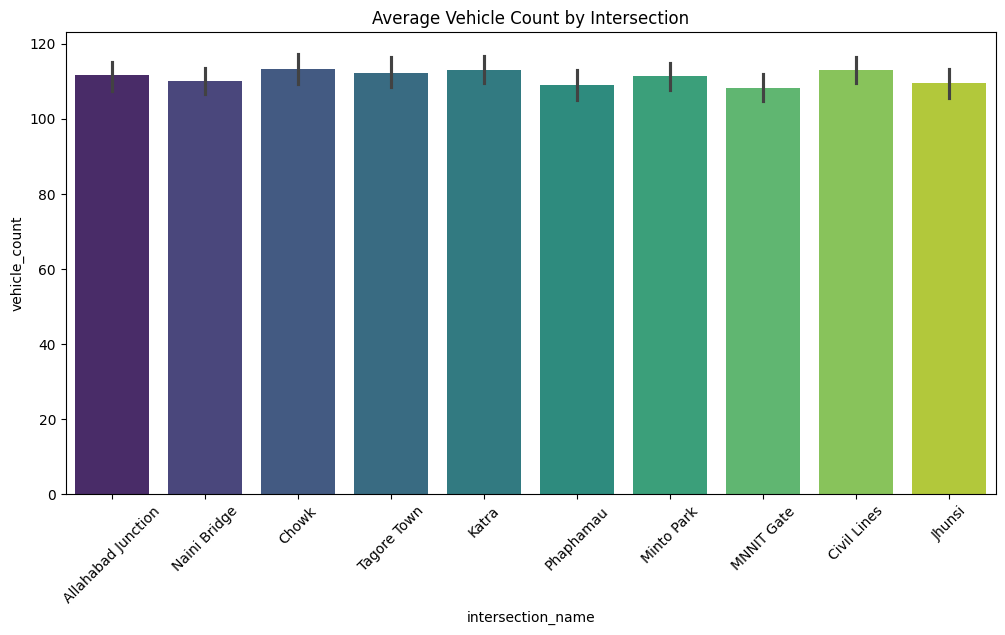

In [4]:
# Bar plot for the count of vehicles by intersection
plt.figure(figsize=(12, 6))
sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='viridis')
plt.title('Average Vehicle Count by Intersection')
plt.xticks(rotation=45)
plt.show()


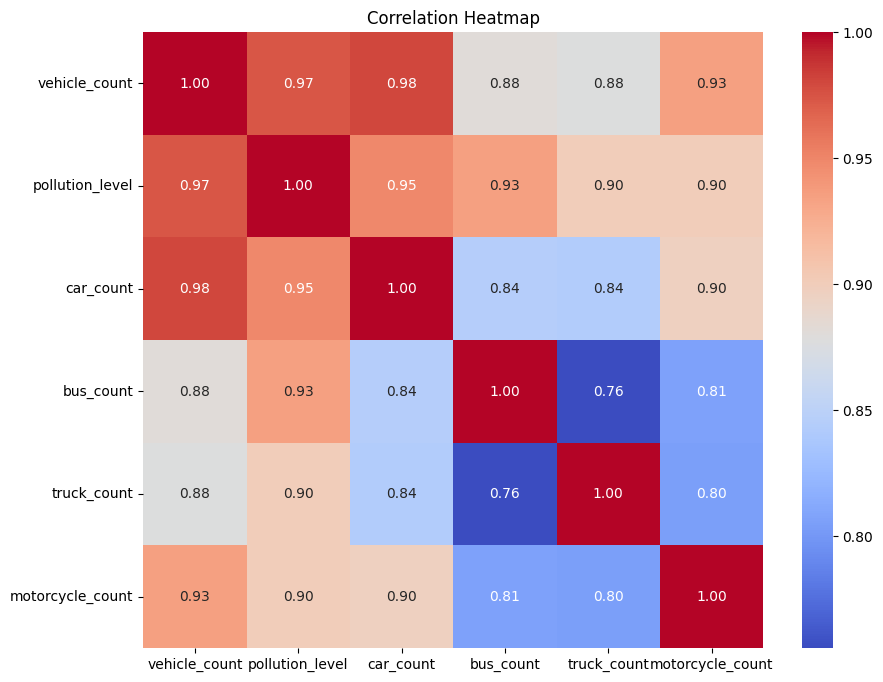

In [5]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[['vehicle_count', 'pollution_level', 'car_count', 'bus_count', 'truck_count', 'motorcycle_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


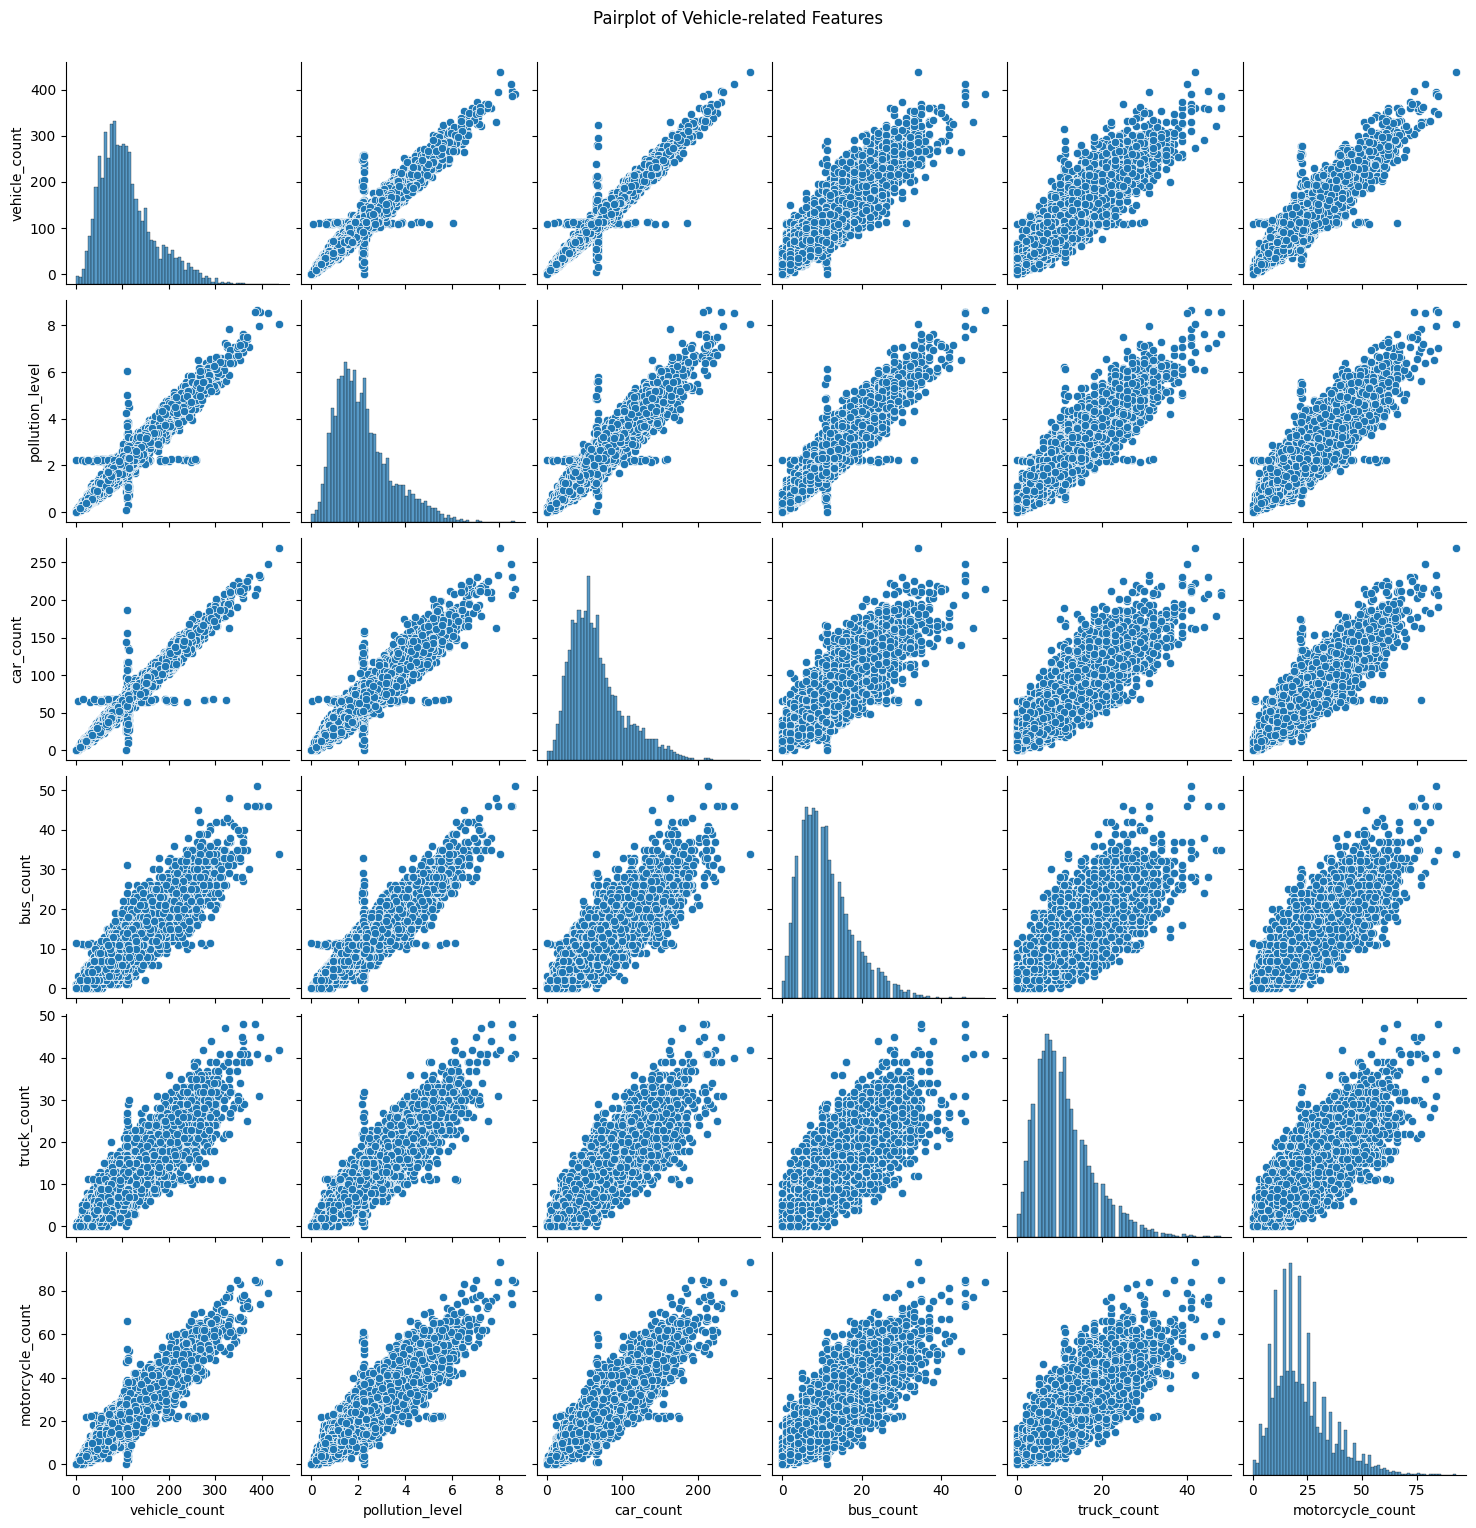

In [6]:
# Pairplot for selected columns
sns.pairplot(df[['vehicle_count', 'pollution_level', 'car_count', 'bus_count', 'truck_count', 'motorcycle_count']])
plt.suptitle('Pairplot of Vehicle-related Features', y=1.02)
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_22792\3346072338.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='vehicle_count', data=df, ci=None)


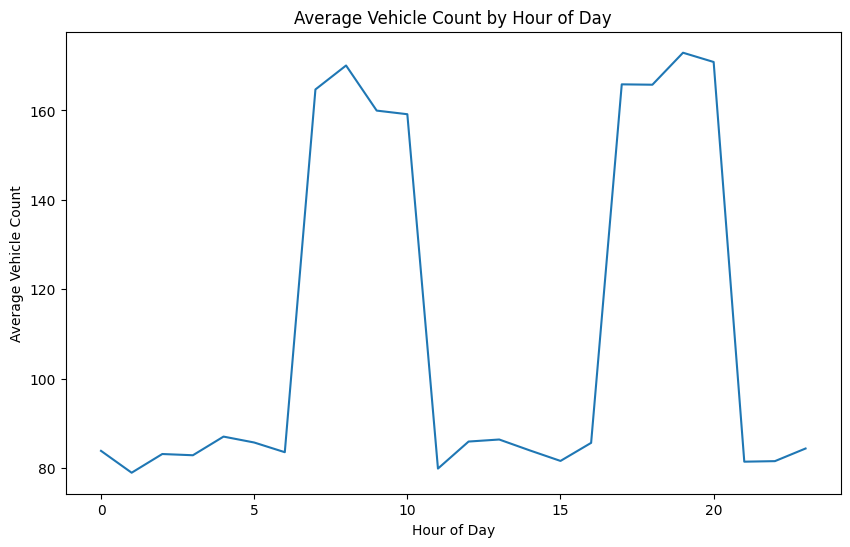

In [7]:
# Line plot of average vehicle count by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='vehicle_count', data=df, ci=None)
plt.title('Average Vehicle Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.show()


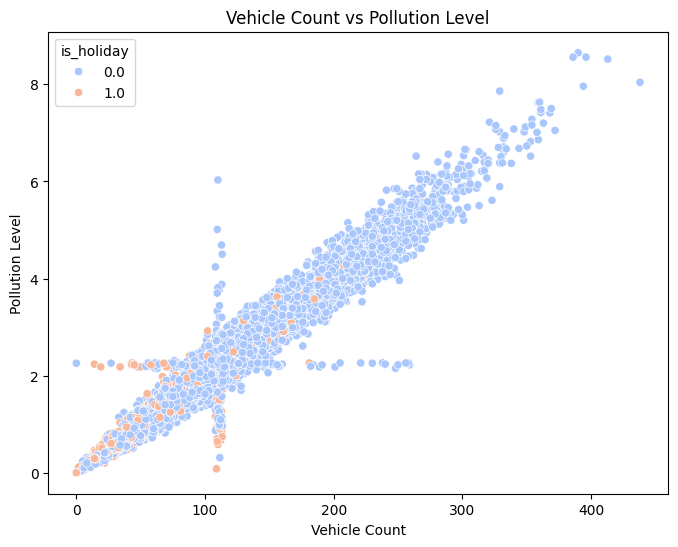

In [8]:
# Scatter plot between vehicle count and pollution level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vehicle_count', y='pollution_level', data=df, hue='is_holiday', palette='coolwarm')
plt.title('Vehicle Count vs Pollution Level')
plt.xlabel('Vehicle Count')
plt.ylabel('Pollution Level')
plt.show()


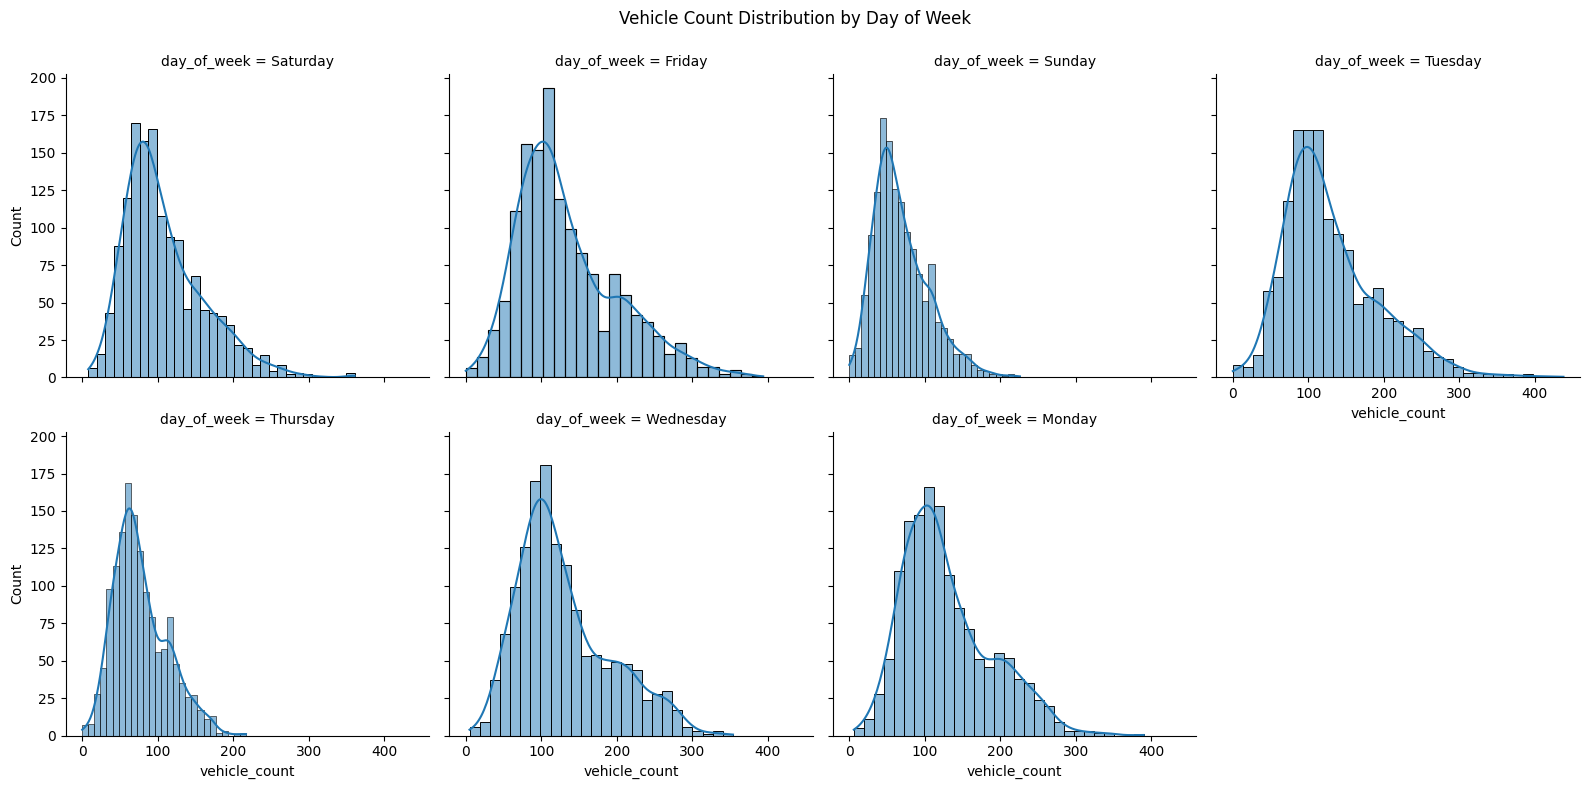

In [9]:
# Facet grid for 'vehicle_count' by 'day_of_week'
g = sns.FacetGrid(df, col='day_of_week', col_wrap=4, height=4)
g.map(sns.histplot, 'vehicle_count', kde=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Vehicle Count Distribution by Day of Week')
plt.show()


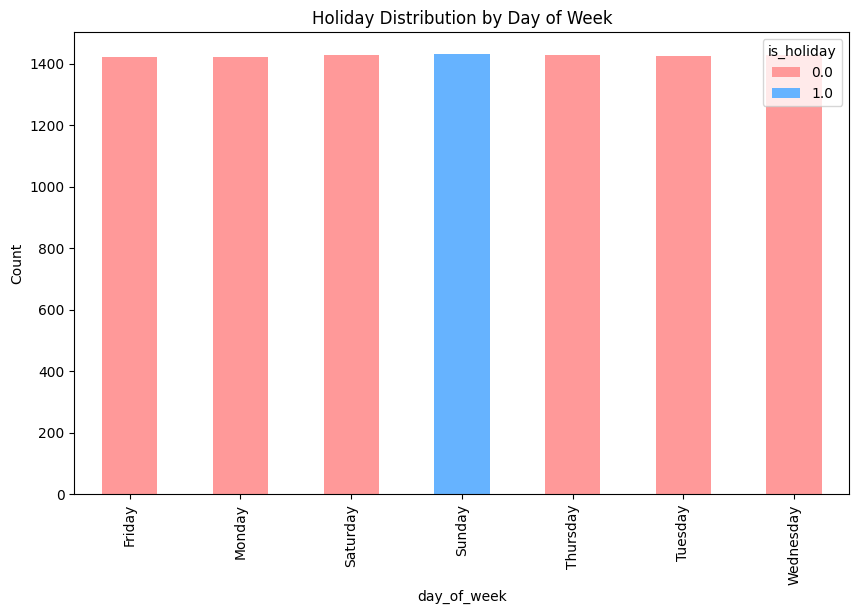

In [10]:
# Stacked bar plot for 'is_holiday' across 'day_of_week'
df.groupby(['day_of_week', 'is_holiday']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Holiday Distribution by Day of Week')
plt.ylabel('Count')
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_22792\1200869626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='Blues_d')


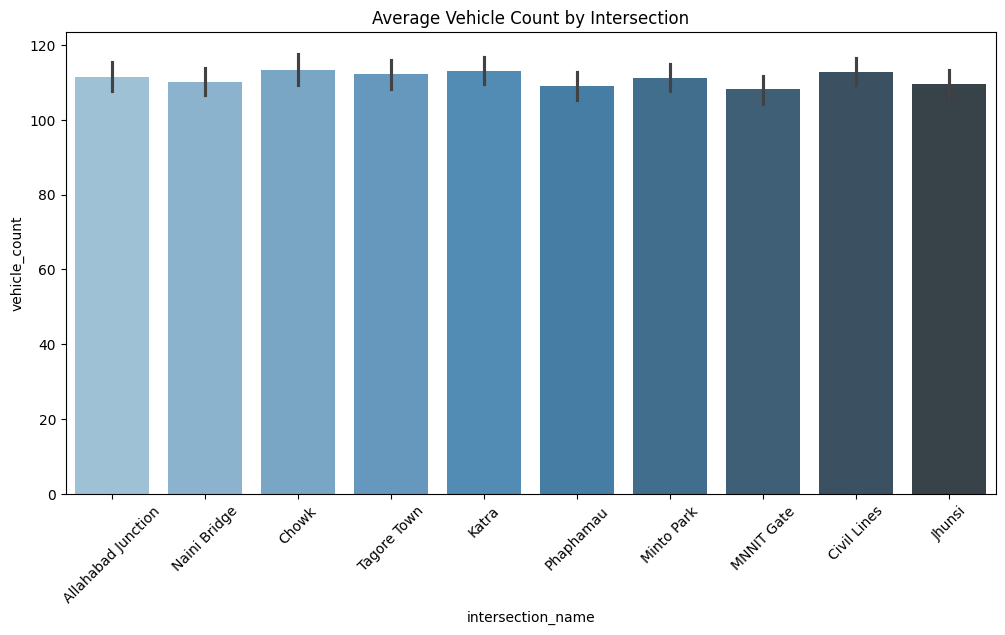

In [11]:
# Bar plot of average 'vehicle_count' by 'intersection_name'
plt.figure(figsize=(12, 6))
sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='Blues_d')
plt.title('Average Vehicle Count by Intersection')
plt.xticks(rotation=45)
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_22792\157766326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vehicle_count'].dropna(), kde=True, color='green', bins=20)


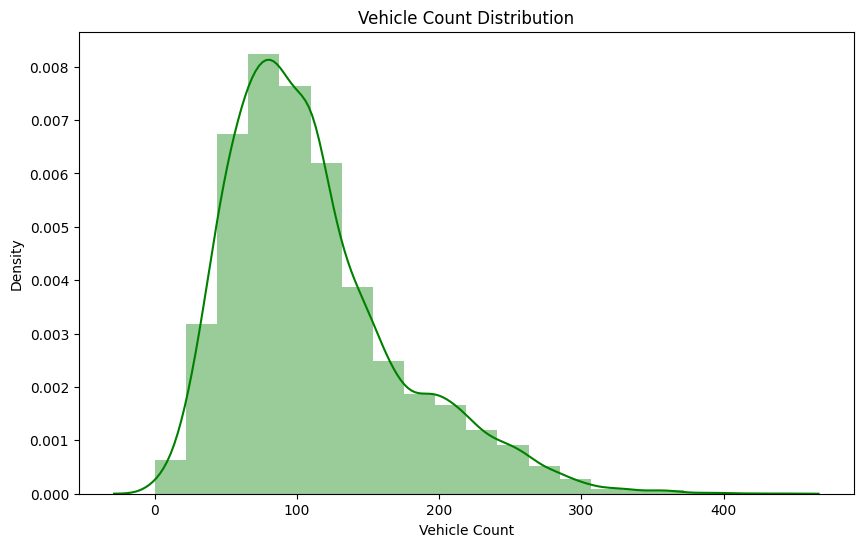

In [12]:
# Distribution plot for 'vehicle_count'
plt.figure(figsize=(10, 6))
sns.distplot(df['vehicle_count'].dropna(), kde=True, color='green', bins=20)
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicle Count')
plt.ylabel('Density')
plt.show()


Text(345.72222222222223, 0.5, 'Intersection')

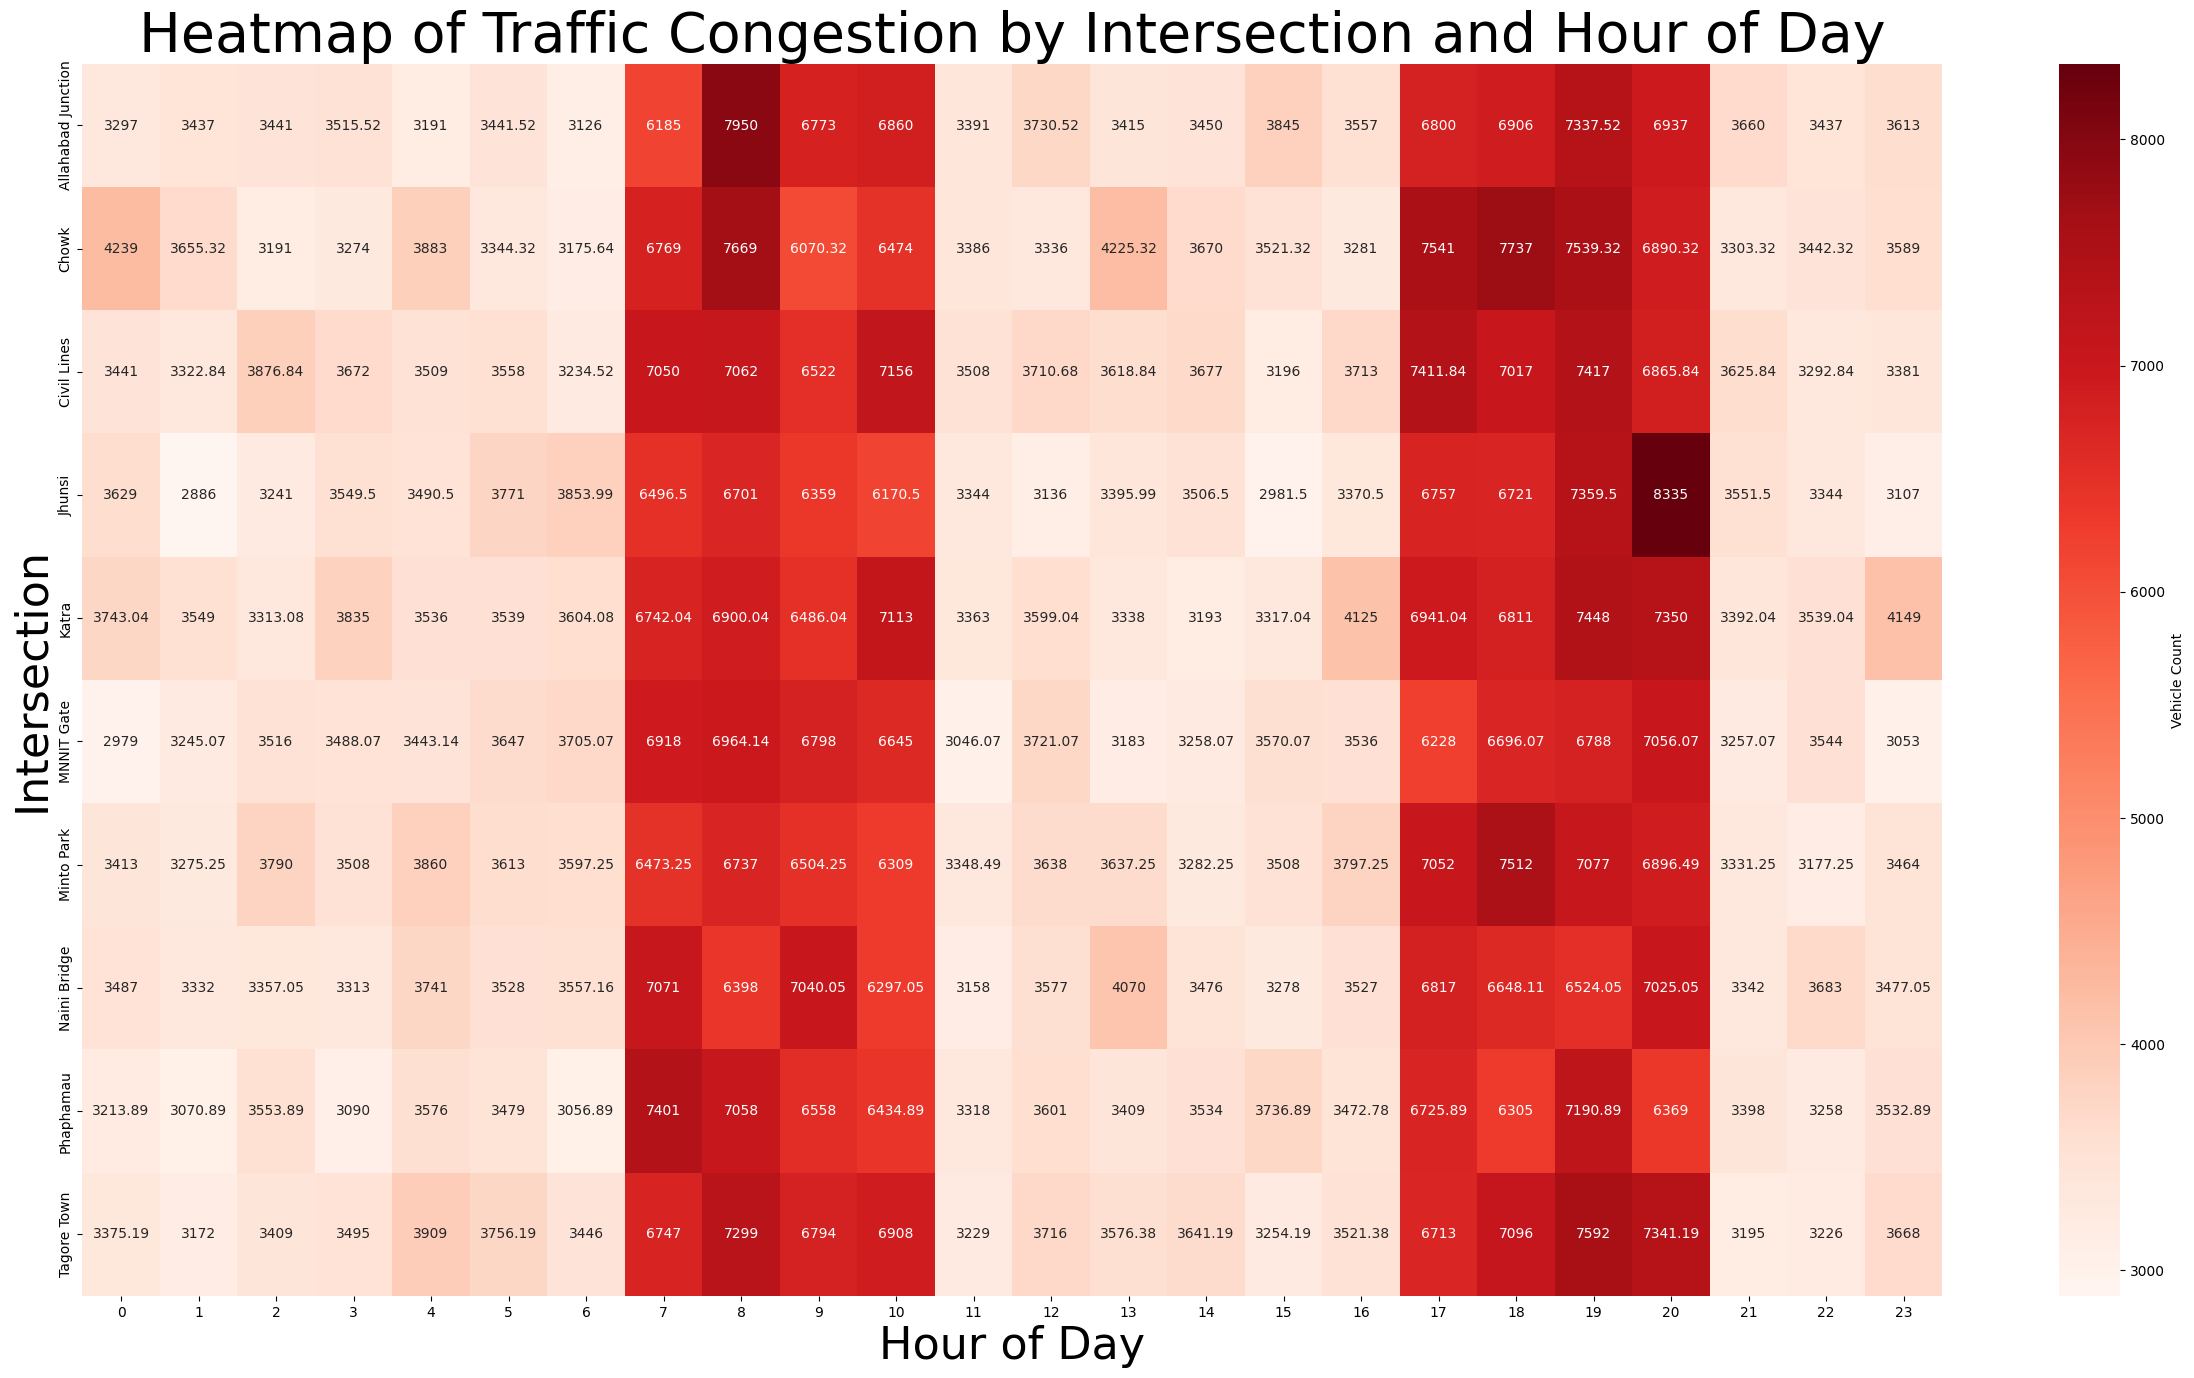

In [13]:
# Step 1: Create a pivot table to summarize data by intersection_name and hour_of_day
heatmap_data = df.pivot_table(index='intersection_name', columns='hour_of_day', values='vehicle_count', aggfunc='sum')

# Step 2: Create the heatmap
plt.figure(figsize=(30, 16))  # Adjust figure size as needed
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt="g", cbar_kws={'label': 'Vehicle Count'})

# Step 3: Set title and labels
plt.title('Heatmap of Traffic Congestion by Intersection and Hour of Day', fontsize=40)
plt.xlabel('Hour of Day', fontsize=32)
plt.ylabel('Intersection', fontsize=32)

Correlation Coefficient between Traffic and Average Speed -0.7751181713227715
Correlation Coefficient between Traffic and Pollution 0.9735617595085584


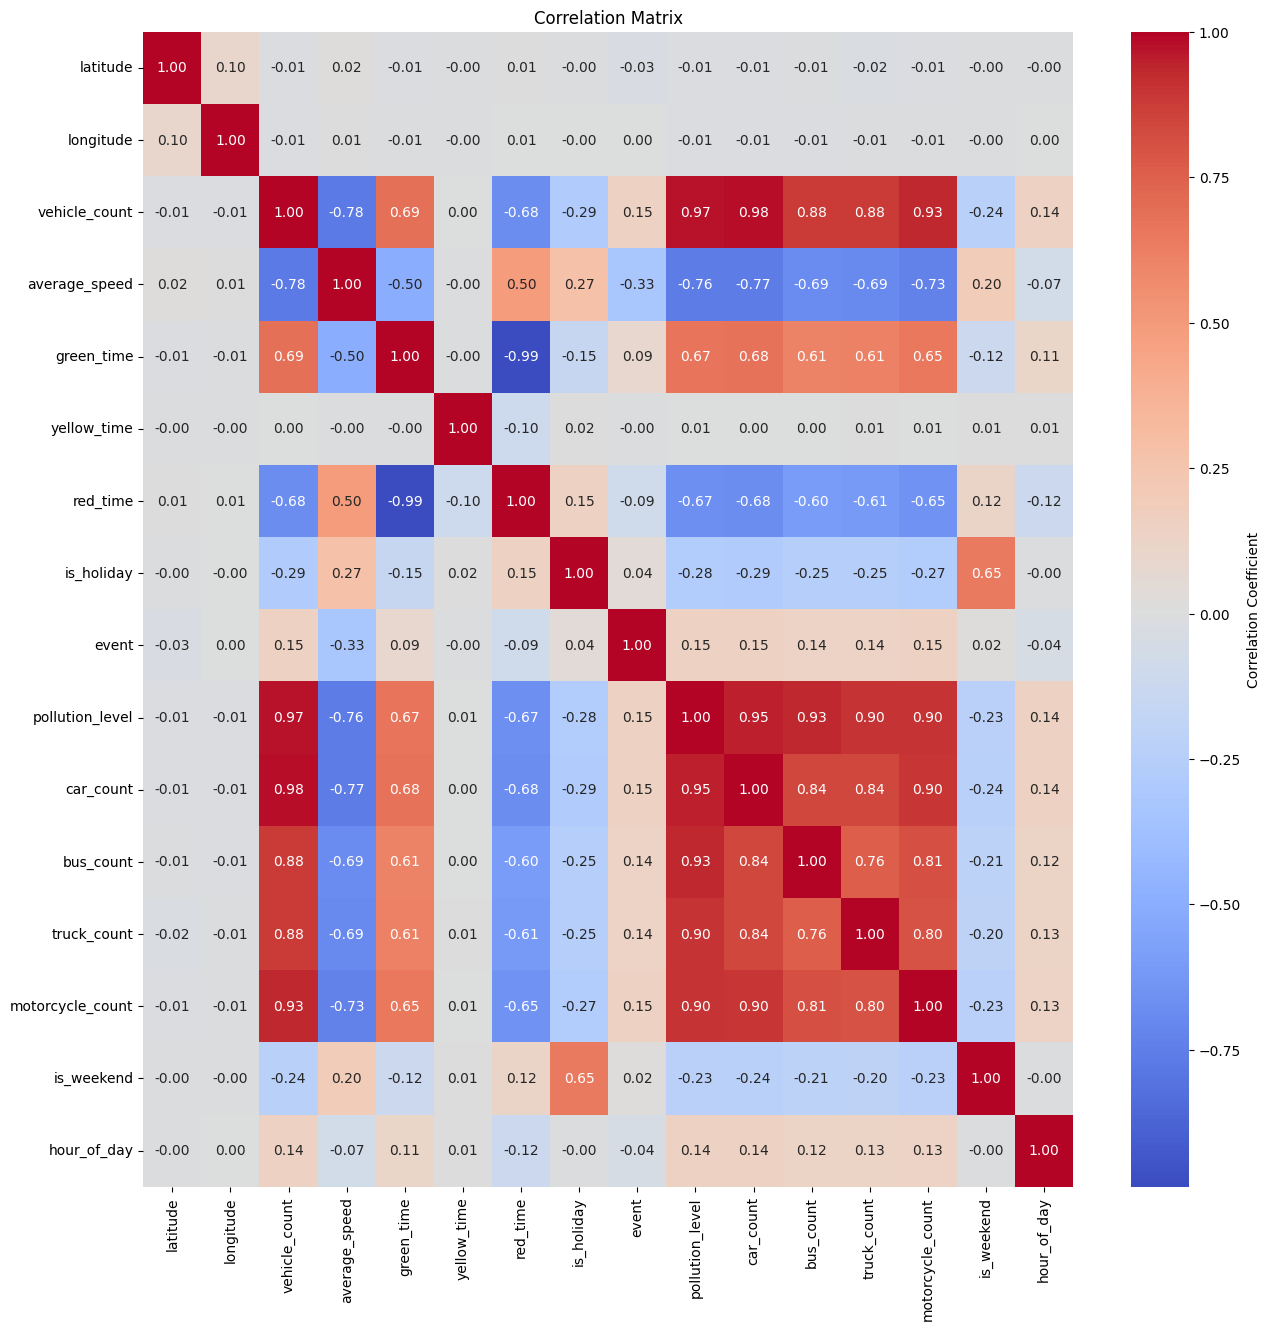

In [14]:
# Step 1: Calculate correlation coefficients
Corr_coef_traffic_VS_avgspeed = df['vehicle_count'].corr(df['average_speed'])
Corr_coef_traffic_VS_pollution = df['vehicle_count'].corr(df['pollution_level'])

print("Correlation Coefficient between Traffic and Average Speed", Corr_coef_traffic_VS_avgspeed)
print("Correlation Coefficient between Traffic and Pollution", Corr_coef_traffic_VS_pollution)

# Step 2: Create a correlation matrix by dropping irrelevant columns
corr_data = df.drop(['signal_cycle_time','record_id','timestamp' ,'intersection_name' , 'intersection_id', 
                       'day_of_week', 'weather_condition'], axis=1)

correlation_matrix = corr_data.corr()

# Step 3: Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

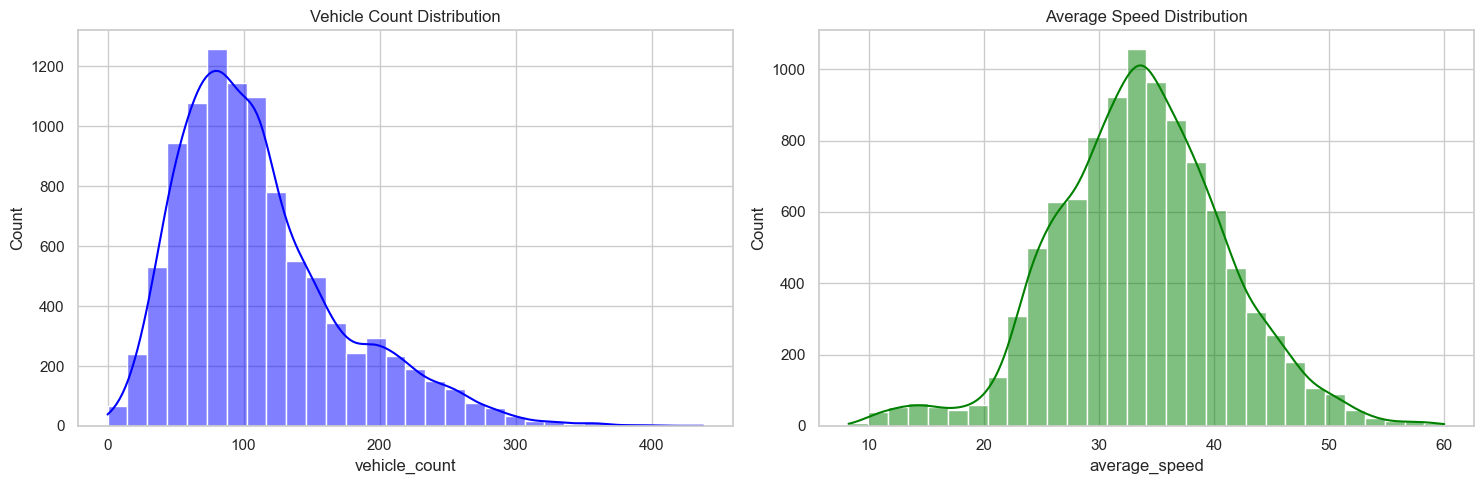

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for distribution curves
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Vehicle Count Distribution
sns.histplot(df['vehicle_count'], bins=30, ax=axs[0], kde=True, color='blue')
axs[0].set_title('Vehicle Count Distribution')

# Average Speed Distribution
sns.histplot(df['average_speed'], bins=30, ax=axs[1], kde=True, color='green')
axs[1].set_title('Average Speed Distribution')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


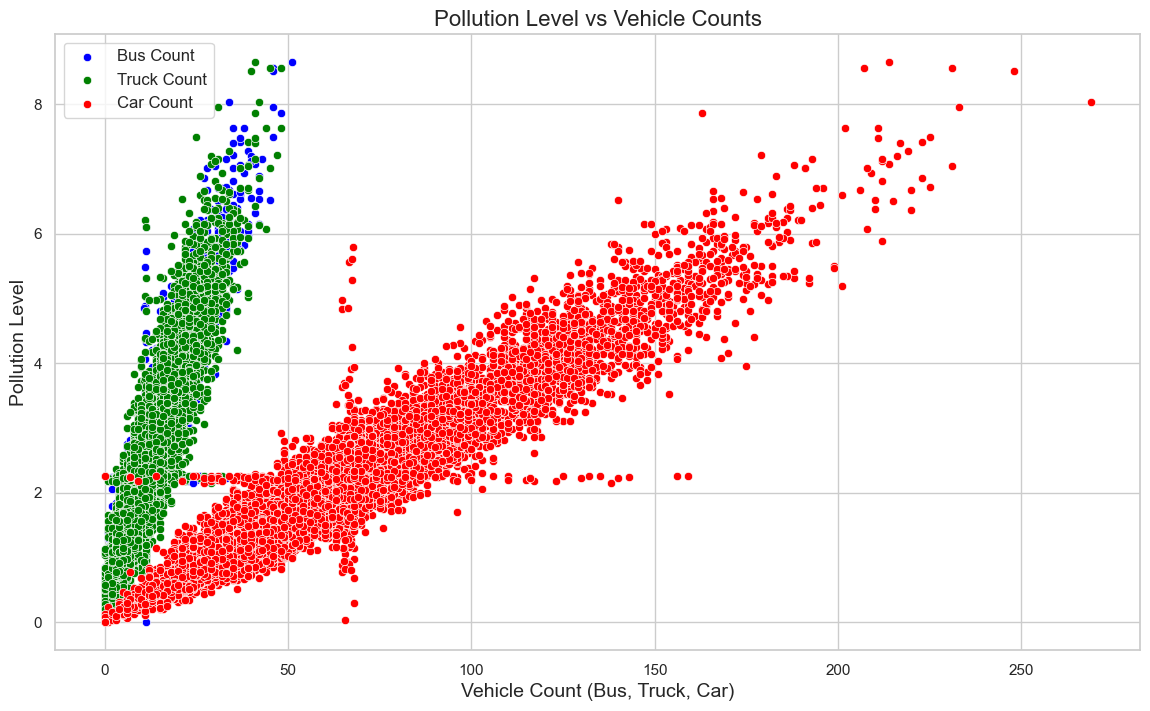

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 8))

# Scatter plot for Bus Count vs Pollution Level
sns.scatterplot(x='bus_count', y='pollution_level', data=df, label='Bus Count', color='blue')

# Scatter plot for Truck Count vs Pollution Level
sns.scatterplot(x='truck_count', y='pollution_level', data=df, label='Truck Count', color='green')

# Scatter plot for Car Count vs Pollution Level
sns.scatterplot(x='car_count', y='pollution_level', data=df, label='Car Count', color='red')

# Set title and labels
plt.title('Pollution Level vs Vehicle Counts', fontsize=16)
plt.xlabel('Vehicle Count (Bus, Truck, Car)', fontsize=14)
plt.ylabel('Pollution Level', fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
